# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     30 non-null     int64  
 1   budget         30 non-null     int64  
 2   domgross       30 non-null     int64  
 3   title          30 non-null     object 
 4   Response_Json  30 non-null     int64  
 5   Year           30 non-null     int64  
 6   imdbRating     30 non-null     float64
 7   Metascore      30 non-null     int64  
 8   imdbVotes      30 non-null     int64  
 9   Model          30 non-null     float64
dtypes: float64(2), int64(7), object(1)
memory usage: 2.5+ KB


In [4]:
# Only keep four predictors and transform the with MinMaxScaler
# domgross is the outcome variable
scaler = MinMaxScaler()

df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
X = df.drop(['domgross'], axis=1)
y = df['domgross']

X_transformed = scaler.fit_transform(X)

X_tr_df = pd.DataFrame(X_transformed, columns = X.columns)
X_tr_df.head()

,budget,imdbRating,Metascore,imdbVotes
0,0.034169,0.839506,0.500000,0.384192
1,0.182956,0.000000,0.000000,0.000000
2,0.066059,1.000000,1.000000,1.000000
3,0.252847,0.827160,0.572917,0.323196
4,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [5]:
#Your code here
X_train, X_test, y_train, y_test = train_test_split(X_tr_df, y, test_size=0.3, random_state=42)

## Fit a regression model to the training data and look at the coefficients

In [6]:
# Your code
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
linreg.coef_

array([ 1.89076706e+08, -9.11312582e+07,  1.29835995e+08,  5.98210537e+07])

In [8]:
metrics.r2_score(y_train, linreg.predict(X_train))

0.45543821064030043

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- A line showing the diagonal of y_train. The actual y_train values are on this line
- Next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The horizontal distances between the points and the lines are the errors.

In [9]:
# your code here
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
y_hat_train = linreg.predict(X_train)

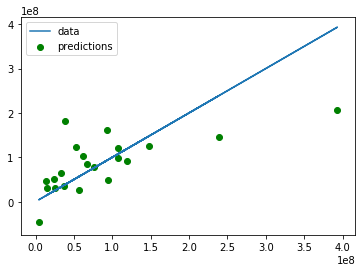

In [11]:
plt.plot(y_train, y_train, label='data');
plt.scatter(y_train, y_hat_train, color='green', label='predictions');
plt.legend();

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

In [12]:
# your code here
y_hat_test = linreg.predict(X_test)

In [13]:
metrics.r2_score(y_test, y_hat_test)

0.2086147445883999

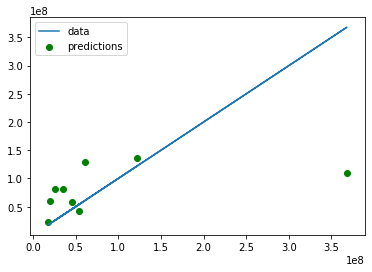

In [14]:
plt.plot(y_test, y_test, label='data');
plt.scatter(y_test, y_hat_test, color='green', label='predictions');
plt.legend();

## Calculate the bias
Create a function `bias` to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [15]:
def bias(y, y_hat):
    return (y_hat-y).mean()

## Calculate the variance
Create a function `variance` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [16]:
def variance(y_hat):
    return (y_hat**2).mean()-(y_hat.mean())**2

## Use your functions to calculate the bias and variance of your model. Do this separately for the train and test sets.

In [17]:
# code for train set bias and variance
'{:.2e}'.format(bias(y_train, y_hat_train)), '{:.2e}'.format(variance(y_hat_train))
# Bias: 2.901719268906659e-17 
# Variance: 0.027449331056376085

('-1.35e-08', '3.44e+15')

In [18]:
# code for test set bias and variance
'{:.2e}'.format(bias(y_test, y_hat_test)), '{:.2e}'.format(variance(y_hat_test))
# Bias: 0.05760433770819166 
# Variance: 0.009213684542614783

('-3.31e+06', '1.33e+15')

## Describe in words what these numbers can tell you.

In [19]:
# Your description here
# rise in bias and slight decrease in variance

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [20]:
# your code here
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)

In [22]:
np.shape(X_train_poly)

(21, 35)

In [23]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Plot your overfitted model's training predictions against the actual data

In [24]:
# your code here
y_poly_pred = reg_poly.predict(X_train_poly)

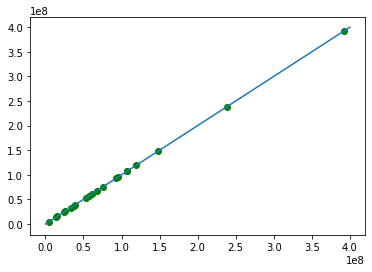

In [25]:
plt.plot([0, 400000000], [0, 400000000]);
plt.scatter(y_train, y_poly_pred, color='green');

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [26]:
# your code here
'{:.2e}'.format(bias(y_train, y_poly_pred)), '{:.2e}'.format(variance(y_poly_pred))
# Bias: -2.5421584029769207e-16 
# Variance: 0.07230707736656222

('-8.12e-08', '7.54e+15')

## Plot your overfitted model's test predictions against the actual data.

In [27]:
# your code here
X_test_poly = poly.fit_transform(X_test)
y_poly_pred_test = reg_poly.predict(X_test_poly)

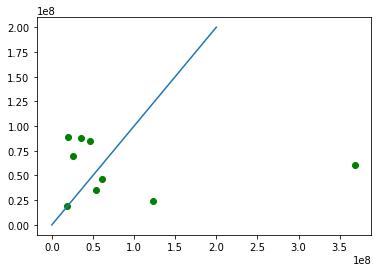

In [28]:
plt.plot([0, 200000000], [0, 200000000]);
plt.scatter(y_test, y_poly_pred_test, color='green');

##  Calculate the bias and variance for the test set.

In [29]:
# your code here
'{:.2e}'.format(bias(y_test, y_poly_pred_test)), '{:.2e}'.format(variance(y_poly_pred_test))
# Bias: -0.16998568902304564 
# Variance: 0.3596092440273582

('-2.58e+07', '6.69e+14')

## Describe what you notice about the bias and variance statistics for your overfit model

In [30]:
# Your description here
# rise in bias and variance decrease

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using a pretty "simple" model, and a very complex model. 